In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import pandas as pd
import sys, os
sys.path.insert(0, "/home/gstupp/projects/WikidataIntegrator")
from wikidataintegrator import wdi_core, wdi_helpers
pd.options.display.max_columns = 100
pd.options.display.max_rows = 200
%pylab
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [3]:
item_df = pd.read_csv("item_count.csv", index_col=0)
item_df.fillna(0, inplace=True)
item_df = item_df.astype(int)
item_df.head()

,unique,total,organic,robotic,"robotic,organic",organic__total,robotic__total,"robotic,organic__total",-,Apache-HttpClient,Apache-Jena-ARQ,Asparagus/Asparagus 0.1,C++ WikiAPI,GuzzleHttp,Jakarta Commons-HttpClient/3.1,Java/1.6.0,Java/1.7.0,Java/1.8.0,Jersey/2.22.1 (HttpUrlConnection 1.8.0_45),Magnus labs tools,MediaWiki/1.30.0-wmf.*,PBB_core fastrun,PetScan,Python-httplib2,Python-urllib,Pywikibot/3.0-dev,QueryBot/0.1,Ruby,WikiDataMovieDB,WikidataR - https://github.com/Ironholds/WikidataR,__find_genus,__match_taxon,automatch,awarder,axios,beaTunes,bot_commons,browser,coords2json,curl,https://github.com/bearloga/WikidataQueryServiceR,images_on_wikidata_not_wikipedia,jgonsior-tree,kartotherian-geoshapes/0.0.10 (https://mediawiki.org/Maps),missing_wp_animal_audio,new_resolve_authors,node-fetch/1.0 (+https://github.com/bitinn/node-fetch),okhttp/3.4.1,orcid_bot,orcidator,...,Asparagus/Asparagus 0.1__total,C++ WikiAPI__total,GuzzleHttp__total,Jakarta Commons-HttpClient/3.1__total,Java/1.6.0__total,Java/1.7.0__total,Java/1.8.0__total,Jersey/2.22.1 (HttpUrlConnection 1.8.0_45)__total,Magnus labs tools__total,MediaWiki/1.30.0-wmf.*__total,PBB_core fastrun__total,PetScan__total,Python-httplib2__total,Python-urllib__total,Pywikibot/3.0-dev__total,QueryBot/0.1__total,Ruby__total,WikiDataMovieDB__total,WikidataR - https://github.com/Ironholds/WikidataR__total,__find_genus__total,__match_taxon__total,automatch__total,awarder__total,axios__total,beaTunes__total,bot_commons__total,browser__total,coords2json__total,curl__total,https://github.com/bearloga/WikidataQueryServiceR__total,images_on_wikidata_not_wikipedia__total,jgonsior-tree__total,kartotherian-geoshapes/0.0.10 (https://mediawiki.org/Maps)__total,missing_wp_animal_audio__total,new_resolve_authors__total,node-fetch/1.0 (+https://github.com/bitinn/node-fetch)__total,okhttp/3.4.1__total,orcid_bot__total,orcidator__total,osm-wikidata/0.1 (https://github.com/EdwardBetts/osm-wikidata; *)__total,other__total,python-requests__total,query__total,rest-client2.0.* (*) ruby/*__total,sparqlwrapper * (rdflib.github.io/sparqlwrapper)__total,taxon_matcher__total,testing__total,update_dynamic__total,wd_edit_stats__total,wdq_image_feed__total
Q43229,543429,1903834,504,542885,40,1043,1902292,499,66,33,8,0,0,0,0,0,0,21,0,1,1984,0,4,0,29,151887,0,0,0,0,0,0,0,0,0,0,0,102661,0,1,0,0,0,0,0,0,8,0,0,0,...,0,0,0,0,0,0,42,0,2,102633,0,27,0,1762,277697,0,0,0,0,0,0,0,0,0,0,0,441632,0,1,0,0,0,0,0,0,23,0,0,0,0,37,218154,0,0,861789,0,0,0,0,0
Q5,353024,4056831,20305,331981,738,34548,3492286,529997,11974,103,5419,0,0,1,2212,10,2,1298,0,3232,2014,0,7821,0,2988,200,3,6,0,0,0,0,2,0,0,0,0,21921,0,5,8,0,0,1,0,1964,8,6,2,0,...,0,0,6,92011,32,20,2255,0,775603,42327,0,12034,0,1578379,1557029,233,6,0,0,0,0,374,0,0,0,0,1601186,0,24,38,0,0,169,0,11450,1606,32,307,0,0,11906,1128269,339,17,54606,0,0,336,0,0
Q11424,229746,875451,3608,226027,111,9776,862303,3372,109375,18852,309,0,0,6967,0,5,18,13,0,156,206,0,11,0,41,1,81748,6,0,0,0,0,2,0,0,9,0,4048,0,8,1,115,0,0,0,0,8,6,0,0,...,0,0,11279,0,18,266,63,0,10970,2123,0,466,0,804,34,169909,12,0,0,0,0,5,0,0,48,0,114902,0,22,20,122,0,0,0,0,1766,30,0,0,0,3350,620,5,0,60544,0,0,0,0,0
Q4830453,193080,300115,1400,191630,50,2125,294824,3166,60935,1,137,0,0,0,0,0,0,4,0,15,162,0,28,0,11,11,0,5,0,0,0,0,1,0,1,0,0,1452,0,0,4,0,0,0,0,0,8,252,0,0,...,0,0,0,0,0,0,1741,0,986,5557,0,132,0,241,79,0,5,0,0,0,0,1,0,7,0,0,5382,0,0,10,0,0,0,0,0,2941,402,0,0,0,590,146143,4,0,4305,0,0,0,0,0
Q17334923,166243,614934,175,166053,15,341,563334,51259,52,6,2,0,0,0,0,0,0,0,0,1,227,0,1,0,2,0,0,0,0,0,0,0,2,0,0,0,0,102306,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,251,4338,0,1,0,766,0,0,0,0,0,0,0,2,0,0,0,0,491684,0,1,0,0,0,0,0,0,0,0,0,0,0,14,168693,0,0,31,0,0,0,0,0


In [4]:
#item_df['nonPBB'] = item_df['unique'] - item_df['PBB_core fastrun']
#item_df['nonPBB__total'] = item_df['total'] - item_df['PBB_core fastrun__total']

In [5]:
# columns I care about first
vc = ['unique', 'total', 'organic', 'organic__total', 'robotic', 'robotic__total',
      'PBB_core fastrun', 'PBB_core fastrun__total',]
      #'nonPBB', 'nonPBB__total']
cols = list(set(item_df.columns) - set(vc))
item_df = item_df[vc + cols]
item_df.head()

,unique,total,organic,organic__total,robotic,robotic__total,PBB_core fastrun,PBB_core fastrun__total,Apache-Jena-ARQ__total,awarder__total,coords2json__total,Magnus labs tools,automatch,Apache-HttpClient__total,GuzzleHttp,taxon_matcher__total,new_resolve_authors,QueryBot/0.1,rest-client2.0.* (*) ruby/*__total,Asparagus/Asparagus 0.1__total,bot_commons__total,sparqlwrapper * (rdflib.github.io/sparqlwrapper)__total,-__total,MediaWiki/1.30.0-wmf.*,wdq_image_feed__total,WikiDataMovieDB,node-fetch/1.0 (+https://github.com/bitinn/node-fetch),wd_edit_stats__total,jgonsior-tree__total,awarder,Pywikibot/3.0-dev,Apache-Jena-ARQ,wdq_image_feed,PetScan,query__total,python-requests,Java/1.7.0__total,Java/1.7.0,beaTunes,axios,okhttp/3.4.1__total,other__total,__match_taxon__total,missing_wp_animal_audio,https://github.com/bearloga/WikidataQueryServiceR,WikidataR - https://github.com/Ironholds/WikidataR__total,WikidataR - https://github.com/Ironholds/WikidataR,Magnus labs tools__total,Java/1.6.0__total,Ruby__total,...,wd_edit_stats,WikiDataMovieDB__total,orcidator,Jersey/2.22.1 (HttpUrlConnection 1.8.0_45),okhttp/3.4.1,node-fetch/1.0 (+https://github.com/bitinn/node-fetch)__total,curl,testing__total,missing_wp_animal_audio__total,python-requests__total,orcidator__total,GuzzleHttp__total,beaTunes__total,C++ WikiAPI,kartotherian-geoshapes/0.0.10 (https://mediawiki.org/Maps),Python-urllib__total,Asparagus/Asparagus 0.1,__match_taxon,Jakarta Commons-HttpClient/3.1__total,coords2json,Ruby,__find_genus__total,QueryBot/0.1__total,Apache-HttpClient,"robotic,organic",jgonsior-tree,osm-wikidata/0.1 (https://github.com/EdwardBetts/osm-wikidata; *),images_on_wikidata_not_wikipedia__total,Java/1.6.0,Java/1.8.0,Jersey/2.22.1 (HttpUrlConnection 1.8.0_45)__total,sparqlwrapper * (rdflib.github.io/sparqlwrapper),MediaWiki/1.30.0-wmf.*__total,"robotic,organic__total",Jakarta Commons-HttpClient/3.1,orcid_bot,C++ WikiAPI__total,rest-client2.0.* (*) ruby/*,Pywikibot/3.0-dev__total,PetScan__total,__find_genus,browser,taxon_matcher,new_resolve_authors__total,browser__total,orcid_bot__total,Java/1.8.0__total,https://github.com/bearloga/WikidataQueryServiceR__total,bot_commons,-
Q43229,543429,1903834,504,1043,542885,1902292,0,0,42,0,0,1,0,218,0,0,0,0,0,0,0,861789,1144,1984,0,0,8,0,0,0,151887,8,0,4,0,37629,0,0,0,0,0,37,0,0,0,0,0,2,0,0,...,0,0,0,0,0,23,1,0,0,218154,0,0,0,0,0,1762,0,0,0,0,0,0,0,33,40,0,0,0,0,21,0,249150,102633,499,0,0,0,0,277697,27,0,102661,0,0,441632,0,42,0,0,66
Q5,353024,4056831,20305,34548,331981,3492286,0,0,73314,0,0,3232,2,1087,1,0,1964,3,17,0,0,54606,231269,2014,0,0,8,0,0,0,200,5419,0,7821,339,289407,20,2,0,0,32,11906,0,0,8,0,0,775603,32,6,...,0,0,0,0,6,1606,5,0,0,1128269,0,6,0,0,1,1578379,0,0,92011,0,6,0,233,103,738,0,0,0,10,1298,0,1464,42327,529997,2212,2,0,3,1557029,12034,0,21921,0,11450,1601186,307,2255,38,0,11974
Q11424,229746,875451,3608,9776,226027,862303,0,0,4359,0,0,156,2,74883,6967,0,0,81748,0,0,0,60544,422689,206,0,0,8,0,0,0,1,309,0,11,5,193,266,18,9,0,30,3350,0,0,1,0,0,10970,18,12,...,0,0,0,0,6,1766,8,0,0,620,0,11279,48,0,0,804,0,0,0,0,6,0,169909,18852,111,0,0,122,5,13,0,6930,2123,3372,0,0,0,0,34,466,0,4048,0,0,114902,0,63,20,0,109375
Q4830453,193080,300115,1400,2125,191630,294824,0,0,4279,0,0,15,1,20,0,0,0,0,0,0,0,4305,132416,162,0,0,8,0,0,0,11,137,0,28,4,129641,0,0,0,1,402,590,0,0,4,0,0,986,0,5,...,0,0,0,0,252,2941,0,0,0,146143,0,0,0,0,0,241,0,0,0,0,5,0,0,1,50,0,0,0,0,4,0,135,5557,3166,0,0,0,0,79,132,0,1452,0,0,5382,0,1741,10,0,60935
Q17334923,166243,614934,175,341,166053,563334,0,0,4,0,0,1,2,16,0,0,0,0,0,0,0,31,1124,227,0,0,0,0,0,0,0,2,0,1,0,63666,0,0,0,0,0,14,0,0,0,0,0,251,0,0,...,0,0,0,0,0,0,1,0,0,168693,0,0,0,0,0,766,0,0,0,0,0,0,0,6,15,0,0,0,0,0,0,9,4338,51259,0,0,0,0,0,1,0,102306,0,0,491684,0,0,0,0,52


In [6]:
top_items = set(item_df.sort_values("unique", ascending=False).index[:20]) | set(item_df.sort_values("total", ascending=False).index[:20])
top_items = list(top_items)

In [7]:
def get_items_label(qids):
    items = wdi_core.WDItemEngine.generate_item_instances(qids)
    qid_label = {x:y.get_label() for x,y in items}
    return [qid_label[qid] for qid in qids]
get_items_label(["Q43229", "Q5", "Q11424"])

['organization', 'human', 'film']

In [8]:
item_labels = dict(zip(top_items, get_items_label(top_items)))
item_df['label'] = item_df.index.map(item_labels.get)
cols = list(item_df.columns)
item_df = item_df[cols[-1:] + cols[:-1]]
item_df = item_df.sort_values("unique", ascending=False)
item_df.head(50)

,label,unique,total,organic,organic__total,robotic,robotic__total,PBB_core fastrun,PBB_core fastrun__total,Apache-Jena-ARQ__total,awarder__total,coords2json__total,Magnus labs tools,automatch,Apache-HttpClient__total,GuzzleHttp,taxon_matcher__total,new_resolve_authors,QueryBot/0.1,rest-client2.0.* (*) ruby/*__total,Asparagus/Asparagus 0.1__total,bot_commons__total,sparqlwrapper * (rdflib.github.io/sparqlwrapper)__total,-__total,MediaWiki/1.30.0-wmf.*,wdq_image_feed__total,WikiDataMovieDB,node-fetch/1.0 (+https://github.com/bitinn/node-fetch),wd_edit_stats__total,jgonsior-tree__total,awarder,Pywikibot/3.0-dev,Apache-Jena-ARQ,wdq_image_feed,PetScan,query__total,python-requests,Java/1.7.0__total,Java/1.7.0,beaTunes,axios,okhttp/3.4.1__total,other__total,__match_taxon__total,missing_wp_animal_audio,https://github.com/bearloga/WikidataQueryServiceR,WikidataR - https://github.com/Ironholds/WikidataR__total,WikidataR - https://github.com/Ironholds/WikidataR,Magnus labs tools__total,Java/1.6.0__total,...,wd_edit_stats,WikiDataMovieDB__total,orcidator,Jersey/2.22.1 (HttpUrlConnection 1.8.0_45),okhttp/3.4.1,node-fetch/1.0 (+https://github.com/bitinn/node-fetch)__total,curl,testing__total,missing_wp_animal_audio__total,python-requests__total,orcidator__total,GuzzleHttp__total,beaTunes__total,C++ WikiAPI,kartotherian-geoshapes/0.0.10 (https://mediawiki.org/Maps),Python-urllib__total,Asparagus/Asparagus 0.1,__match_taxon,Jakarta Commons-HttpClient/3.1__total,coords2json,Ruby,__find_genus__total,QueryBot/0.1__total,Apache-HttpClient,"robotic,organic",jgonsior-tree,osm-wikidata/0.1 (https://github.com/EdwardBetts/osm-wikidata; *),images_on_wikidata_not_wikipedia__total,Java/1.6.0,Java/1.8.0,Jersey/2.22.1 (HttpUrlConnection 1.8.0_45)__total,sparqlwrapper * (rdflib.github.io/sparqlwrapper),MediaWiki/1.30.0-wmf.*__total,"robotic,organic__total",Jakarta Commons-HttpClient/3.1,orcid_bot,C++ WikiAPI__total,rest-client2.0.* (*) ruby/*,Pywikibot/3.0-dev__total,PetScan__total,__find_genus,browser,taxon_matcher,new_resolve_authors__total,browser__total,orcid_bot__total,Java/1.8.0__total,https://github.com/bearloga/WikidataQueryServiceR__total,bot_commons,-
Q43229,organization,543429,1903834,504,1043,542885,1902292,0,0,42,0,0,1,0,218,0,0,0,0,0,0,0,861789,1144,1984,0,0,8,0,0,0,151887,8,0,4,0,37629,0,0,0,0,0,37,0,0,0,0,0,2,0,...,0,0,0,0,0,23,1,0,0,218154,0,0,0,0,0,1762,0,0,0,0,0,0,0,33,40,0,0,0,0,21,0,249150,102633,499,0,0,0,0,277697,27,0,102661,0,0,441632,0,42,0,0,66
Q5,human,353024,4056831,20305,34548,331981,3492286,0,0,73314,0,0,3232,2,1087,1,0,1964,3,17,0,0,54606,231269,2014,0,0,8,0,0,0,200,5419,0,7821,339,289407,20,2,0,0,32,11906,0,0,8,0,0,775603,32,...,0,0,0,0,6,1606,5,0,0,1128269,0,6,0,0,1,1578379,0,0,92011,0,6,0,233,103,738,0,0,0,10,1298,0,1464,42327,529997,2212,2,0,3,1557029,12034,0,21921,0,11450,1601186,307,2255,38,0,11974
Q11424,film,229746,875451,3608,9776,226027,862303,0,0,4359,0,0,156,2,74883,6967,0,0,81748,0,0,0,60544,422689,206,0,0,8,0,0,0,1,309,0,11,5,193,266,18,9,0,30,3350,0,0,1,0,0,10970,18,...,0,0,0,0,6,1766,8,0,0,620,0,11279,48,0,0,804,0,0,0,0,6,0,169909,18852,111,0,0,122,5,13,0,6930,2123,3372,0,0,0,0,34,466,0,4048,0,0,114902,0,63,20,0,109375
Q4830453,business,193080,300115,1400,2125,191630,294824,0,0,4279,0,0,15,1,20,0,0,0,0,0,0,0,4305,132416,162,0,0,8,0,0,0,11,137,0,28,4,129641,0,0,0,1,402,590,0,0,4,0,0,986,0,...,0,0,0,0,252,2941,0,0,0,146143,0,0,0,0,0,241,0,0,0,0,5,0,0,1,50,0,0,0,0,4,0,135,5557,3166,0,0,0,0,79,132,0,1452,0,0,5382,0,1741,10,0,60935
Q17334923,location,166243,614934,175,341,166053,563334,0,0,4,0,0,1,2,16,0,0,0,0,0,0,0,31,1124,227,0,0,0,0,0,0,0,2,0,1,0,63666,0,0,0,0,0,14,0,0,0,0,0,251,0,...,0,0,0,0,0,0,1,0,0,168693,0,0,0,0,0,766,0,0,0,0,0,0,0,6,15,0,0,0,0,0,0,9,4338,51259,0,0,0,0,0,1,0,102306,0,0,491684,0,0,0,0,52
Q15642541,human-geographic territorial entity,159973,1150201,25,52,159942,1147713,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,51,203697,150,0,0,0,0,0,0,0,1,0,0,0,111617,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9395

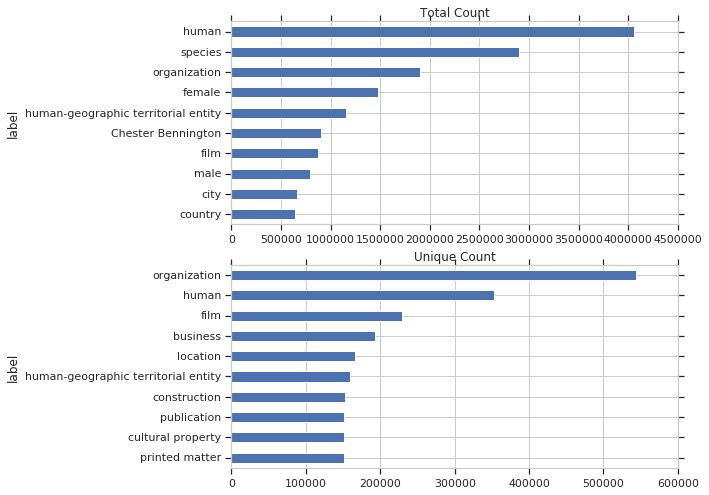

In [9]:
item_df['qid'] = item_df.index
item_df.index = item_df['label']
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(211)
df = item_df.sort_values("total")[-10:]
df[['total']].plot.barh(ax=ax, legend=False)
ax2 = fig.add_subplot(212)
df = item_df.sort_values("unique")[-10:]
df[['unique']].plot.barh(ax=ax2, legend=False)
ax.set_title("Total Count")
ax2.set_title("Unique Count")

In [ ]:
item_df.index = item_df['qid']
del item_df['qid']
del item_df['label']

In [41]:
## look at all diseases
disease_qids = set(wdi_helpers.id_mapper("P699").values())

In [42]:
bm_item_df = item_df.reindex(disease_qids)
bm_item_df = bm_item_df.replace(0, pd.np.nan).dropna(axis=0, how="all").dropna(axis=1, how="all").fillna(0)

In [43]:
len(bm_item_df)

4471

In [44]:
top_items = set(bm_item_df.sort_values("unique", ascending=False).index[:20]) | set(bm_item_df.sort_values("total", ascending=False).index[:20])
top_items = list(top_items)

In [45]:
item_labels = dict(zip(top_items, get_items_label(top_items)))
bm_item_df['label'] = bm_item_df.index.map(item_labels.get)
cols = list(bm_item_df.columns)
bm_item_df = bm_item_df[cols[-1:] + cols[:-1]]
bm_item_df = bm_item_df.sort_values("unique", ascending=False)
bm_item_df.head(5)

,label,unique,total,organic,organic__total,robotic,robotic__total,PBB_core fastrun,PBB_core fastrun__total,Apache-Jena-ARQ__total,Magnus labs tools,GuzzleHttp,sparqlwrapper * (rdflib.github.io/sparqlwrapper)__total,-__total,MediaWiki/1.30.0-wmf.*,node-fetch/1.0 (+https://github.com/bitinn/node-fetch),Apache-Jena-ARQ,PetScan,python-requests,other__total,Magnus labs tools__total,Java/1.6.0__total,Ruby__total,images_on_wikidata_not_wikipedia,other,Python-urllib,node-fetch/1.0 (+https://github.com/bitinn/node-fetch)__total,python-requests__total,GuzzleHttp__total,C++ WikiAPI,Python-urllib__total,Ruby,"robotic,organic",images_on_wikidata_not_wikipedia__total,Java/1.6.0,Java/1.8.0,sparqlwrapper * (rdflib.github.io/sparqlwrapper),MediaWiki/1.30.0-wmf.*__total,"robotic,organic__total",C++ WikiAPI__total,PetScan__total,browser,browser__total,Java/1.8.0__total,-
qid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Q12136,disease,828.0,2773.0,684.0,963.0,140.0,1627.0,2.0,12.0,17.0,4.0,0.0,161.0,8.0,50.0,0.0,6.0,1.0,21.0,47.0,349.0,2.0,11.0,0.0,7.0,4.0,0.0,119.0,0.0,0.0,38.0,11.0,4.0,0.0,2.0,6.0,22.0,922.0,183.0,0.0,19.0,692.0,1247.0,28.0,6.0
Q23037771,goat milk allergy,515.0,2221.0,0.0,0.0,515.0,2221.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,513.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2207.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,12.0,0.0,0.0
Q18123741,infectious disease,448.0,5148.0,29.0,87.0,419.0,5061.0,395.0,5010.0,4.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,6.0,0.0,0.0,0.0,11.0,0.0,0.0,1.0,0.0,16.0,0.0,0.0,8.0,11.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,32.0,97.0,0.0,0.0
Q12135,mental disorder,432.0,5151.0,2.0,3.0,430.0,5148.0,395.0,5010.0,24.0,0.0,0.0,12.0,17.0,0.0,0.0,18.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,60.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,21.0,0.0,3.0
Q2351083,disease of metabolism,423.0,5043.0,4.0,5.0,419.0,5038.0,395.0,5010.0,13.0,0.0,0.0,2.0,1.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,9.0,0.0,1.0


In [46]:
bm_item_df['qid'] = bm_item_df.index
bm_item_df.index = bm_item_df['label']

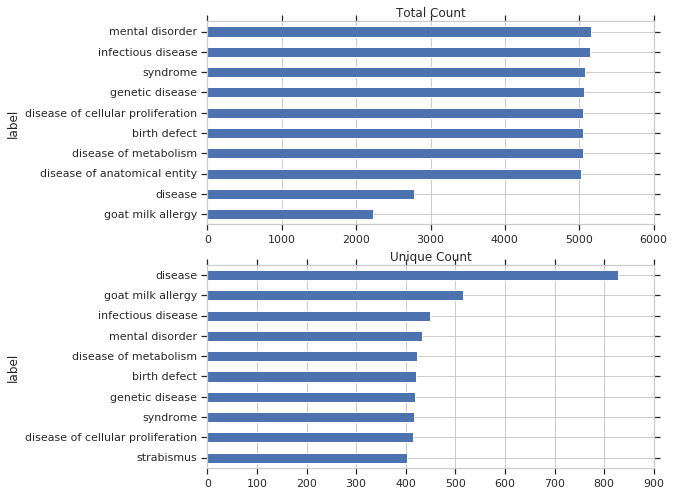

In [47]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(211)
df = bm_item_df.sort_values("total")[-10:]
df[['total']].plot.barh(ax=ax, legend=False)
ax2 = fig.add_subplot(212)
df = bm_item_df.sort_values("unique")[-10:]
df[['unique']].plot.barh(ax=ax2, legend=False)
ax.set_title("Total Count")
ax2.set_title("Unique Count")

In [14]:
bm_item_df = item_df.reindex(disease_qids).sort_values("PBB_core fastrun", ascending=False).dropna(axis=0, how="all").dropna(axis=1, how="all")
total = bm_item_df.sum(axis=0)
cols = bm_item_df.columns[total>1000]
bm_item_df = bm_item_df[cols]
bm_item_df = bm_item_df.astype(int)
bm_item_df.loc[:50, 'label'] = get_items_label(list(bm_item_df.index[:50]))
cols = list(bm_item_df.columns)
bm_item_df = bm_item_df[cols[-1:] + cols[:-1]]

In [48]:
bm_item_df.head(10)

,label,unique,total,organic,organic__total,robotic,robotic__total,PBB_core fastrun,PBB_core fastrun__total,Apache-Jena-ARQ__total,Magnus labs tools,GuzzleHttp,sparqlwrapper * (rdflib.github.io/sparqlwrapper)__total,-__total,MediaWiki/1.30.0-wmf.*,node-fetch/1.0 (+https://github.com/bitinn/node-fetch),Apache-Jena-ARQ,PetScan,python-requests,other__total,Magnus labs tools__total,Java/1.6.0__total,Ruby__total,images_on_wikidata_not_wikipedia,other,Python-urllib,node-fetch/1.0 (+https://github.com/bitinn/node-fetch)__total,python-requests__total,GuzzleHttp__total,C++ WikiAPI,Python-urllib__total,Ruby,"robotic,organic",images_on_wikidata_not_wikipedia__total,Java/1.6.0,Java/1.8.0,sparqlwrapper * (rdflib.github.io/sparqlwrapper),MediaWiki/1.30.0-wmf.*__total,"robotic,organic__total",C++ WikiAPI__total,PetScan__total,browser,browser__total,Java/1.8.0__total,-,qid
label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
disease,disease,828.0,2773.0,684.0,963.0,140.0,1627.0,2.0,12.0,17.0,4.0,0.0,161.0,8.0,50.0,0.0,6.0,1.0,21.0,47.0,349.0,2.0,11.0,0.0,7.0,4.0,0.0,119.0,0.0,0.0,38.0,11.0,4.0,0.0,2.0,6.0,22.0,922.0,183.0,0.0,19.0,692.0,1247.0,28.0,6.0,Q12136
goat milk allergy,goat milk allergy,515.0,2221.0,0.0,0.0,515.0,2221.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,513.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2207.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,12.0,0.0,0.0,Q23037771
infectious disease,infectious disease,448.0,5148.0,29.0,87.0,419.0,5061.0,395.0,5010.0,4.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,6.0,0.0,0.0,0.0,11.0,0.0,0.0,1.0,0.0,16.0,0.0,0.0,8.0,11.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,32.0,97.0,0.0,0.0,Q18123741
mental disorder,mental disorder,432.0,5151.0,2.0,3.0,430.0,5148.0,395.0,5010.0,24.0,0.0,0.0,12.0,17.0,0.0,0.0,18.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,60.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,21.0,0.0,3.0,Q12135
disease of metabolism,disease of metabolism,423.0,5043.0,4.0,5.0,419.0,5038.0,395.0,5010.0,13.0,0.0,0.0,2.0,1.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,9.0,0.0,1.0,Q2351083
birth defect,birth defect,420.0,5054.0,2.0,3.0,418.0,5051.0,395.0,5010.0,18.0,0.0,0.0,2.0,0.0,0.0,0.0,13.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,15.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,7.0,0.0,0.0,Q727096
genetic disease,genetic disease,419.0,5058.0,3.0,4.0,416.0,5054.0,395.0,5010.0,13.0,0.0,0.0,6.0,2.0,0.0,0.0,13.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,11.0,0.0,1.0,Q200779
syndrome,syndrome,417.0,5075.0,4.0,5.0,413.0,5070.0,395.0,5010.0,23.0,0.0,0.0,10.0,0.0,0.0,0.0,4.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,19.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,6.0,13.0,0.0,0.0,Q179630
disease of cellular proliferation,disease of cellular proliferation,415.0,5056.0,2.0,3.0,413.0,5053.0,395.0,5010.0,0.0,0.0,0.0,2.0,3.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,1.0,29.0,0.0,0.0,0.0,3.0,7.0,2.0,3.0,Q18554796


In [49]:
bm_item_df = item_df.reindex(disease_qids).sort_values("organic", ascending=False).dropna(axis=0, how="all").dropna(axis=1, how="all")
total = bm_item_df.sum(axis=0)
cols = bm_item_df.columns[total>1000]
bm_item_df = bm_item_df[cols]
bm_item_df = bm_item_df.astype(int)
bm_item_df.loc[:10, 'label'] = get_items_label(list(bm_item_df.index[:10]))
cols = list(bm_item_df.columns)
bm_item_df = bm_item_df[cols[-1:] + cols[:-1]]

In [50]:
bm_item_df.head(10)

,label,unique,total,organic,organic__total,robotic,robotic__total,PBB_core fastrun,PBB_core fastrun__total,Apache-Jena-ARQ__total,sparqlwrapper * (rdflib.github.io/sparqlwrapper)__total,-__total,Apache-Jena-ARQ,python-requests,other__total,images_on_wikidata_not_wikipedia,node-fetch/1.0 (+https://github.com/bitinn/node-fetch)__total,python-requests__total,images_on_wikidata_not_wikipedia__total,sparqlwrapper * (rdflib.github.io/sparqlwrapper),"robotic,organic__total",browser,browser__total
qid,,,,,,,,,,,,,,,,,,,,,,,
Q12136,disease,828,2773,684,963,140,1627,2,12,17,161,8,6,21,47,0,0,119,0,22,183,692,1247
Q12078,cancer,236,804,167,363,65,405,0,0,91,12,29,15,13,149,0,30,40,0,2,36,173,404
Q3286546,Respiratory system disease,107,142,87,112,20,30,0,0,13,2,1,13,1,0,0,0,3,0,1,0,90,122
Q35869,asthma,81,257,53,79,26,82,1,13,29,9,17,18,3,0,0,0,102,0,1,96,56,179
Q11085,Parkinson disease,78,120,43,45,35,75,1,14,13,13,0,13,7,0,1,0,19,1,2,0,53,58
Q18556002,central nervous system cancer,36,60,32,40,4,20,0,0,0,2,0,0,0,0,0,0,0,0,1,0,35,58
Q11081,Alzheimers disease,96,178,32,44,64,134,2,16,34,14,0,16,2,0,36,10,14,42,2,0,33,48
Q1477,ulcerative colitis,117,157,30,36,85,115,1,2,15,18,4,13,0,0,65,0,0,73,1,6,35,49
Q18123741,infectious disease,448,5148,29,87,419,5061,395,5010,4,2,0,2,6,0,0,0,16,0,1,0,32,97


In [51]:
#### get other biomedical types
disease_qids = set(wdi_helpers.id_mapper("P699").values())
gene_qids = set(wdi_helpers.id_mapper("P351").values())
protein_qids = set(wdi_helpers.id_mapper("P352").values())
drug_qids = set(wdi_helpers.id_mapper("P662").values())  # pubchem CID

In [56]:
d_item_df = item_df.reindex(disease_qids)
g_item_df = item_df.reindex(gene_qids)
p_item_df = item_df.reindex(protein_qids)
drug_item_df = item_df.reindex(drug_qids)
df = pd.DataFrame([d_item_df.sum(), g_item_df.sum(), p_item_df.sum(), drug_item_df.sum()], index=["disease", "gene", "protein", "drug"])
df['num_items'] = [len(disease_qids), len(gene_qids), len(protein_qids), len(drug_qids)]
df = df.replace(0, pd.np.nan).dropna(axis=0, how="all").dropna(axis=1, how="all").fillna(0)
df.head()

,unique,total,organic,organic__total,robotic,robotic__total,PBB_core fastrun,PBB_core fastrun__total,Apache-Jena-ARQ__total,Magnus labs tools,Apache-HttpClient__total,GuzzleHttp,sparqlwrapper * (rdflib.github.io/sparqlwrapper)__total,-__total,MediaWiki/1.30.0-wmf.*,node-fetch/1.0 (+https://github.com/bitinn/node-fetch),Apache-Jena-ARQ,PetScan,python-requests,other__total,Magnus labs tools__total,Java/1.6.0__total,Ruby__total,images_on_wikidata_not_wikipedia,curl__total,other,Python-urllib,node-fetch/1.0 (+https://github.com/bitinn/node-fetch)__total,curl,python-requests__total,GuzzleHttp__total,C++ WikiAPI,Python-urllib__total,Jakarta Commons-HttpClient/3.1__total,Ruby,Apache-HttpClient,"robotic,organic",images_on_wikidata_not_wikipedia__total,Java/1.6.0,Java/1.8.0,sparqlwrapper * (rdflib.github.io/sparqlwrapper),MediaWiki/1.30.0-wmf.*__total,"robotic,organic__total",Jakarta Commons-HttpClient/3.1,C++ WikiAPI__total,PetScan__total,browser,browser__total,Java/1.8.0__total,-,num_items
disease,82388.0,181241.0,1742.0,2689.0,80465.0,175696.0,3483.0,44200.0,38023.0,8.0,0.0,2.0,11167.0,1252.0,73.0,145.0,32049.0,3.0,1515.0,2208.0,701.0,12.0,152.0,28829.0,0.0,146.0,108.0,1440.0,0.0,6134.0,2.0,1.0,293.0,0.0,152.0,0.0,181.0,30826.0,12.0,81.0,4640.0,980.0,2856.0,0.0,94.0,205.0,10669.0,44490.0,135.0,515.0,11240
gene,11795.0,30899.0,163.0,313.0,11618.0,30389.0,29.0,58.0,3531.0,0.0,12897.0,4.0,2084.0,529.0,0.0,212.0,725.0,0.0,1002.0,604.0,0.0,52.0,0.0,3518.0,0.0,63.0,0.0,962.0,0.0,4431.0,1372.0,0.0,0.0,18.0,0.0,4789.0,14.0,3611.0,9.0,3.0,965.0,0.0,197.0,1.0,0.0,0.0,231.0,825.0,15.0,255.0,757218
protein,950.0,3798.0,37.0,51.0,913.0,3747.0,0.0,0.0,1342.0,0.0,0.0,0.0,658.0,143.0,0.0,23.0,204.0,0.0,294.0,19.0,0.0,0.0,0.0,185.0,0.0,3.0,0.0,118.0,0.0,1184.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,198.0,0.0,0.0,140.0,0.0,0.0,0.0,0.0,0.0,52.0,136.0,0.0,49.0,533161
drug,42692.0,209740.0,544.0,1021.0,42136.0,208661.0,90.0,171.0,7015.0,0.0,1.0,6.0,20866.0,688.0,0.0,218.0,452.0,0.0,1291.0,3877.0,0.0,92.0,94.0,25533.0,2.0,97.0,47.0,1905.0,1.0,8030.0,85148.0,0.0,150.0,9.0,89.0,1.0,12.0,27382.0,52.0,124.0,11023.0,0.0,58.0,2.0,0.0,0.0,3391.0,54166.0,236.0,295.0,145961


In [61]:
df[['unique', 'total', 'organic', 'robotic', 'num_items']].astype(int).to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>unique</th>\n      <th>total</th>\n      <th>organic</th>\n      <th>robotic</th>\n      <th>num_items</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>disease</th>\n      <td>82388</td>\n      <td>181241</td>\n      <td>1742</td>\n      <td>80465</td>\n      <td>11240</td>\n    </tr>\n    <tr>\n      <th>gene</th>\n      <td>11795</td>\n      <td>30899</td>\n      <td>163</td>\n      <td>11618</td>\n      <td>757218</td>\n    </tr>\n    <tr>\n      <th>protein</th>\n      <td>950</td>\n      <td>3798</td>\n      <td>37</td>\n      <td>913</td>\n      <td>533161</td>\n    </tr>\n    <tr>\n      <th>drug</th>\n      <td>42692</td>\n      <td>209740</td>\n      <td>544</td>\n      <td>42136</td>\n      <td>145961</td>\n    </tr>\n  </tbody>\n</table>'